In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

### Let's make a multivariate linear regression

The following dataset is also common, referred to as the Wine Quality Dataset. A local copy of this dataset is provided in Moodle.
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
wine = pd.read_csv('winequality-white.csv')
wine.tail()

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [3]:
q_max = wine['Quality'].max()
q_min = wine['Quality'].min()
print (q_max, q_min)

9 3


In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)

In [5]:
# Extracting data
X = wine.drop(['Quality'], axis=1)
y = wine['Quality']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Making a split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# training the model
lm.fit(X_train, y_train);
#print (lm.coef_, lm.intercept_);

In [9]:
# Let's make predictions
y_pred = lm.predict(X_test)

In [10]:
mse = np.square(np.subtract(y_test.values, y_pred)).mean()
print ('Mean square error is: {0:2.2f}'.format(mse))

Mean square error is: 0.56


### Using Stochastic Gradient Descend with Python Skilearn

In [11]:
from sklearn.linear_model import SGDRegressor

In [12]:
gdlm = SGDRegressor(fit_intercept = True, eta0=0.01, learning_rate = 'constant', max_iter = 1000)

#### Let's scale the columns between 0 and 1

In [13]:
## Let's scale the columns between 0 and 1
for i in range(12):
    cmin = wine.iloc[:,i].min()
    cmax = wine.iloc[:,i].max()
    wine.iloc[:,i] = (wine.iloc[:,i]-cmin)/(cmax-cmin)
    
wine.head()

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


In [14]:
# Extracting data
X = wine.drop(['Quality'], axis=1)
y = wine['Quality']

In [15]:
# Making a split
Xs_train = X.iloc[np.array(X_train.index), :]
Xs_test = X.iloc[np.array(X_test.index), :]
ys_train = y.iloc[np.array(y_train.index)]
ys_test = y.iloc[np.array(y_test.index)]

In [16]:
gdlm.fit(Xs_train, ys_train);
ys_pred = gdlm.predict(Xs_test)

In [17]:
sgmse = np.square(np.subtract(ys_test.values, ys_pred)).mean()
print ('Mean square error with Sotchastic Gradient is: {0:2.3f}'.format(sgmse))

Mean square error with Sotchastic Gradient is: 0.015


In [18]:
# MSE scaled to the original values
sgmses =  np.square(np.subtract(ys_test.values*(q_max-q_min)+q_min, ys_pred*(q_max-q_min)+q_min)).mean()
print ('Mean square error is: {0:2.3f}'.format(sgmses))

Mean square error is: 0.547


In [19]:
#gdlm.coef_
gdlm.intercept_

array([0.39952561])

### Using stochastic gradient descent in Python

In [62]:
X.tail()

# This has 11 features and 4897 wines that were analysed 

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194
4897,0.211538,0.127451,0.228916,0.003067,0.032641,0.069686,0.206497,0.044342,0.490909,0.116279,0.612903


In [63]:
nrows, ncols = X.shape
print (nrows, ncols)

4898 11


In [64]:
# Let's keep just the data, from a DataFrame to numpy array
Xd = X.values
yd = y.values
#print (Xd[-5:])

In [65]:
# Let's append to the data Xd a column of ones as we have done previously
ones = np.ones(nrows).reshape(nrows,1)  # a column of 4898 ones
Xd = np.hstack((ones,Xd))               # inserting the column of ones to the wine data

#print (Xd[-5:])

In [66]:
# Making a split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, yd)

# We will train the weights with a random selection of a number of wines

In [75]:
# An initial guess for W, say of zero
W = np.zeros(ncols+1) # We add one to account for w0

# A small constant learning factor
l = 0.001

# An arbitrary number of epochs
P = 100

error_history = np.zeros(P)
n = Xd_train.shape[0]

# The gradient descent algorithm
for t in range(P):                           # The number of epochs
    for i in range(n):                       # The amount of data, we have five points
        yp = np.dot(W, Xd_train[i,:])        # prediction
        e = yp - y[i]                        # error
        W = W - l*e*Xd_train[i,:]            # update of weights
    error_history[t] = e                     # error recording 

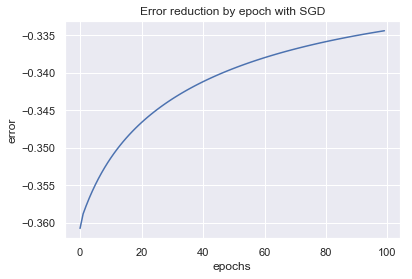

In [76]:
sns.lineplot(np.arange(P), error_history )
plt.title('Error reduction by epoch with SGD')
plt.xlabel('epochs')
plt.ylabel('error');

In [77]:
print (W[0])

0.4271586043744007


In [78]:
# let's make predictions
test_size = Xd_test.shape[0]
for i in range(test_size):
    yd_pred = np.dot(W, Xd_test[i,:])

In [79]:
mse = np.square(np.subtract(yd_test, yd_pred)).mean()
print ('Mean square error is: {0:2.3f}'.format(mse))

Mean square error is: 0.022


In [80]:
# MSE scaled to the original values
mses =  np.square(np.subtract(yd_test*(q_max-q_min)+q_min, yd_pred*(q_max-q_min)+q_min)).mean()
print ('Mean square error is: {0:2.3f}'.format(mses))

Mean square error is: 0.780


## To do - Lab on your own

- Perform a three-fold cross validation on the problem above. 

Note: This is probably harder. What you need to do is to split your data randomly into 3 equal size chunks. Use 1/3 of the data for testing and 2/3 for training. Then repeat it two more times rotating the chunck used for testing and traning. Take the avarage of the three MSE you have obtained for each test chunk. 